In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/content/kaggle.json

! pip install -q kaggle

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:28<00:00, 172MB/s]
100% 2.70G/2.70G [00:28<00:00, 101MB/s]


In [ ]:
import zipfile
zipLocation = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip')
zipLocation.extractall('/content')
zipLocation.close()

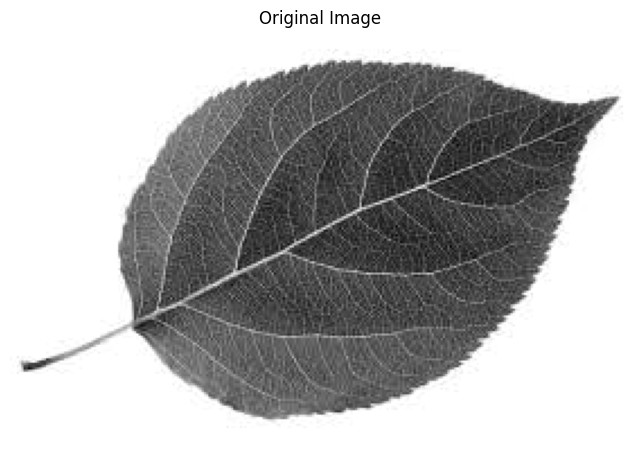

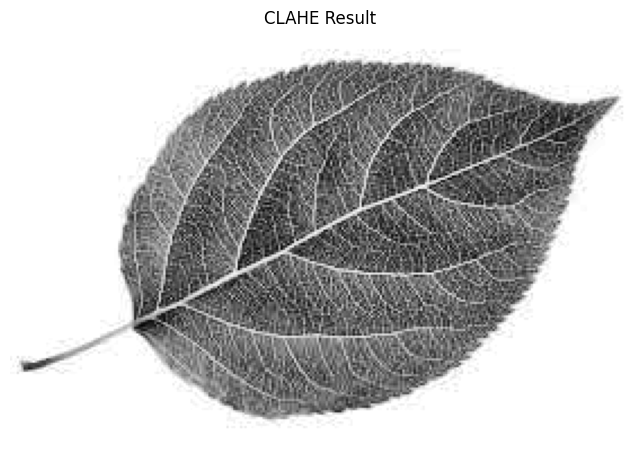

In [ ]:
#clahe

import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

def apply_clahe(image):
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the image
    clahe_image = clahe.apply(image)
    return clahe_image

# Apply CLAHE to the image
clahe_result = apply_clahe(image)

# Display the CLAHE result
plt.figure(figsize=(8, 8))
plt.imshow(clahe_result, cmap='gray')
plt.title('CLAHE Result')
plt.axis('off')
plt.show()

# # Save the CLAHE processed image (Optional)
# cv2.imwrite('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight1.JPG', clahe_result)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to your dataset
train_data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 350

# Define the number of classes
num_classes = 38  # Update this according to the actual number of your classes

# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation for validation dataset
validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
# Load MobileNetV2 as the base model, with pretrained weights and without the top layer
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_width, img_height, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('plant_disease_mobilenetv2.h5')

# Model summary
model.summary()

Epoch 1/20
200/200 [==============================] - 470s 2s/step - loss: 1.1597 - accuracy: 0.6665 - val_loss: 0.4177 - val_accuracy: 0.8773
Epoch 2/20
200/200 [==============================] - 459s 2s/step - loss: 0.5586 - accuracy: 0.8248 - val_loss: 0.3327 - val_accuracy: 0.8938
Epoch 3/20
200/200 [==============================] - 457s 2s/step - loss: 0.4552 - accuracy: 0.8566 - val_loss: 0.3025 - val_accuracy: 0.8999
Epoch 4/20
200/200 [==============================] - 455s 2s/step - loss: 0.4066 - accuracy: 0.8689 - val_loss: 0.2594 - val_accuracy: 0.9139
Epoch 5/20
200/200 [==============================] - 443s 2s/step - loss: 0.3742 - accuracy: 0.8792 - val_loss: 0.2472 - val_accuracy: 0.9178
Epoch 6/20
200/200 [==============================] - 455s 2s/step - loss: 0.3493 - accuracy: 0.8861 - val_loss: 0.2304 - val_accuracy: 0.9225
Epoch 7/20
200/200 [==============================] - 441s 2s/step - loss: 0.3291 - accuracy: 0.8925 - val_loss: 0.2260 - val_accuracy: 0.9242

In [ ]:
# Classes based upon the input labels
classes = [
    'Apple_Apple_scab', 'Apple_Black_rot', 'Apple_Cedar_apple_rust', 'Apple_healthy',
    'Blueberry_healthy', 'Cherry_including_sour_healthy', 'Cherry_including_sour_Powdery_mildew',
    'Corn_maize_Cercospora_leaf_spot Gray_leaf_spot', 'Corn_maize_Common_rust', 'Corn_maize_healthy', 'Corn_maize_Northern_Leaf_Blight',
    'Grape_Black_rot', 'Grape_Esca_Black_Measles', 'Grape_healthy', 'Grape_Leaf_blight_Isariopsis_Leaf_Spot',
    'Orange_Haunglongbing_Citrus_greening', 'Peach_Bacterial_spot', 'Peach_healthy',
    'Pepper_bell_Bacterial_spot', 'Pepper_bell_healthy', 'Potato_Early_blight', 'Potato_healthy', 'Potato_Late_blight',
    'Raspberry_healthy', 'Soybean_healthy', 'Squash_Powdery_mildew', 'Strawberry_healthy', 'Strawberry_Leaf_scorch',
    'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two-spotted_spider_mite', 'Tomato_Target_Spot',
    'Tomato_Tomato_mosaic_virus', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus'
]






# Load the model for inference and testing
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = tf.keras.models.load_model('/content/plant_disease_mobilenetv2.h5')


# Load and preprocess an image
img_path = '/content/test/test/PotatoHealthy1.JPG'  # Update this path
img = load_img(img_path, target_size=(img_width, img_height))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=-1)
predicted_class = classes[predicted_class_index[0]]

# Print the prediction result
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 1s 1s/step
Predicted class: Potato_Late_blight


In [ ]:
import matplotlib.pyplot as plt
# Plotting the training and validation loss
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Loss')

# Plotting the training and validation accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()